In [14]:
!pip install opencv-python

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [15]:
human_metadata = pd.read_csv("https://raw.githubusercontent.com/muxspace/facial_expressions/master/data/legend.csv")
human_metadata.head(10)

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral
5,302,Aaron_Guiel_0001.jpg,happiness
6,302,Aaron_Patterson_0001.jpg,neutral
7,302,Aaron_Peirsol_0001.jpg,happiness
8,302,Aaron_Peirsol_0002.jpg,happiness
9,302,Aaron_Peirsol_0003.jpg,happiness


In [16]:
human_metadata.emotion.unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

In [0]:
human_metadata['emotion'] = human_metadata['emotion'].apply(lambda x: x.lower())

In [18]:
human_metadata.emotion.unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt'], dtype=object)

In [19]:
human_metadata['emotion'].value_counts()

neutral      6868
happiness    5696
surprise      368
sadness       268
anger         252
disgust       208
fear           21
contempt        9
Name: emotion, dtype: int64

In [0]:
human_metadata_fear = human_metadata.loc[human_metadata['emotion'] == 'fear'].assign(Labels='3')
human_metadata_disgust = human_metadata.loc[human_metadata['emotion'] == 'disgust'].assign(Labels='2')
human_metadata_anger = human_metadata.loc[human_metadata['emotion'] == 'anger'].assign(Labels='1')
human_metadata_sadness = human_metadata.loc[human_metadata['emotion'] == 'sadness'].assign(Labels='6')
human_metadata_surprise = human_metadata.loc[human_metadata['emotion'] == 'surprise'].assign(Labels='7')
human_metadata_happiness = human_metadata.loc[human_metadata['emotion'] == 'happiness'].sample(n=1000).assign(Labels='4')
human_metadata_neutral = human_metadata.loc[human_metadata['emotion'] == 'neutral'].sample(n=1000).assign(Labels='5')

In [21]:
human_metadata_fear

,user.id,image,emotion,Labels
3,628,facial-expressions_2868582k.jpg,fear,3
3259,302,Ellen_DeGeneres_0002.jpg,fear,3
3366,302,Erika_Harold_0002.jpg,fear,3
4469,302,Gerry_Parsky_0001.jpg,fear,3
5346,302,Iva_Majoli_0002.jpg,fear,3
5356,302,Jackie_Chan_0006.jpg,fear,3
5900,dwdii,Jennifer_Aniston_0001.jpg,fear,3
7828,dwdii,Lleyton_Hewitt_0013.jpg,fear,3
8913,dwdii,Mirela_Manjani_0001.jpg,fear,3
9175,dwdii,Nate_Blackwell_0001.jpg,fear,3


In [22]:
frames = [human_metadata_anger, human_metadata_disgust, human_metadata_fear, human_metadata_happiness, human_metadata_neutral, human_metadata_sadness, human_metadata_surprise]
human_metadata_final = pd.concat(frames)
human_metadata_final.reset_index(inplace=True, drop=True)
human_metadata_final = human_metadata_final.sample(frac=1.0)
human_metadata_final.reset_index(inplace=True, drop=True)
human_metadata_final.head()

,user.id,image,emotion,Labels
0,302,Dale_Earnhardt_Jr_0001.jpg,happiness,4
1,dwdii,Mark_Philippoussis_0001.jpg,neutral,5
2,302,Dennis_Kucinich_0006.jpg,anger,1
3,dwdii,Monica_Seles_0003.jpg,anger,1
4,dwdii,Luiz_Inacio_Lula_da_Silva_0005.jpg,neutral,5


In [23]:
human_metadata_final.shape

(3117, 4)

In [0]:
!mkdir human_images
!chmod 777 human_images

In [28]:
import requests
base_url = "https://raw.githubusercontent.com/muxspace/facial_expressions/master/images/"
base_folder = "human_images/"
for i, d in human_metadata_final.iterrows():
  img_data = requests.get(base_url+d["image"]).content
  with open(base_folder+d["image"],"wb") as handler:
    handler.write(img_data)
  if i%100 == 0:
    print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


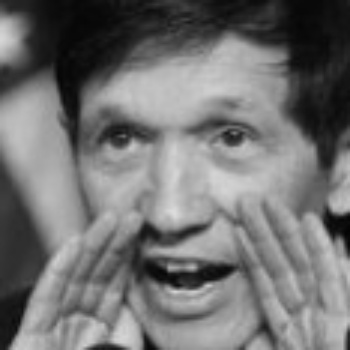

In [30]:
from PIL import Image
Image.open(base_folder+human_metadata_final['image'].iloc[2])

In [0]:
page = requests.get("https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml").text
with open("haarcascade_frontalface_default.xml", "w") as handler:
  handler.write(page)

In [33]:
for i, d in human_metadata_final.iterrows():
  img = cv2.imread(base_folder+d["image"])
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    face_clip = img[y:y+h, x:x+w]
    cv2.imwrite(base_folder+d["image"], cv2.resize(face_clip, (350, 350)))
  if i%100 == 0:
    print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [35]:
!zip -r human_images.zip human_images

  adding: human_images/ (stored 0%)
  adding: human_images/Jennifer_Lopez_0012.jpg (deflated 1%)
  adding: human_images/Ted_Maher_0001.jpg (deflated 1%)
  adding: human_images/Phil_Bennett_0001.jpg (deflated 1%)
  adding: human_images/Serena_Williams_0030.jpg (deflated 0%)
  adding: human_images/Ryan_Goodman_0001.jpg (deflated 1%)
  adding: human_images/Mark_Schweiker_0002.jpg (deflated 1%)
  adding: human_images/Hugo_Chavez_0070.jpg (deflated 1%)
  adding: human_images/Alvaro_Uribe_0002.jpg (deflated 0%)
  adding: human_images/James_Jones_0002.jpg (deflated 1%)
  adding: human_images/Franz_Muentefering_0002.jpg (deflated 1%)
  adding: human_images/Charles_Moose_0006.jpg (deflated 0%)
  adding: human_images/Sam_Torrance_0003.jpg (deflated 1%)
  adding: human_images/Muhammad_Saeed_al-Sahhaf_0001.jpg (deflated 1%)
  adding: human_images/Keith_Tyson_0001.jpg (deflated 1%)
  adding: human_images/Barbara_Walters_0002.jpg (deflated 1%)
  adding: human_images/Lindsay_Davenport_0012.jpg (defla

In [0]:
human_metadata_final.to_pickle("human_metadata_final.pkl")